In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import plotly.figure_factory as ff
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Firs Step to take a look at the data we have

In [2]:
# The Sales Data

ds = pd.read_excel("Operations Analyst Test.xlsx" , sheet_name= "Sales")

ds.head()

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber
0,Maadi_Hub,Mobile,CCMW000927752,4704.414,2022-04-02 05:00:00,2022-06-02 12:00:00,2022-06-02 10:03:00,2952
1,El-Safwa,Mobile,CCMW000928857,934.560,2022-05-02 00:30:00,2022-06-02 11:00:00,2022-06-02 03:00:00,2947
2,Maadi_Hub,Mobile,CCMW000928860,862.510,2022-05-02 00:33:00,2022-06-02 14:00:00,2022-06-02 09:36:00,2992
3,Dokki,Mobile,CCMW000930206,1641.816,2022-06-02 06:46:00,2022-06-02 14:00:00,2022-06-02 13:14:00,1702
4,City Stars,web,CCMW000930207,2159.454,2022-06-02 06:45:00,2022-06-02 11:00:00,2022-06-02 08:30:00,1972


In [3]:
# The Cashiers Data

dc = pd.read_excel("Operations Analyst Test.xlsx" , sheet_name= "Cashiers")

dc.head()

,CashierName,CashierNumber
0,k.magdy,2952
1,s.talaat,2947
2,y.hany,2992
3,S.Gamal,1702
4,m.nagah,1972


In [4]:

# Making some functions to use on the data
    # The below inputs are the required for the functions to work
        # sn = Sheet Name 
        # cn = column Name
        # name = name of the new column

# Shows the number of the duplicated values

def dupnum(sn , cn):
    mod = ((sn.duplicated(cn)).sum())
    return mod

# Function shows the total value without the duplicated ones's

def nondup(sn, cn):
    mo = ((~sn.duplicated(cn)).sum())
    return mo

# Trim whitespace from ends of each value across all series in dataframe

def trim_all_columns(df):
    trim_strings = lambda x: x.strip() if isinstance(x, str) else x
    return df.applymap(trim_strings)

# Shows the repeated data in the data after cleaning

def rept(sn , cn):
    ssn = sn[sn[cn].duplicated()].value_counts()
    gssn = ssn.groupby(cn).count()
    return gssn

# Removing the duplicates related to a specific column name

def removedup(sn , cn):
    sn = sn.drop_duplicates(cn)
    sn = sn.reset_index(drop= True)
    return sn

# Changing format from 24 hour to pm and am

def format_change(sn, cn):
    format = '%Y-%m-%d %I:%M %p'
    sn[cn] = pd.to_datetime(sn[cn])
    sn[cn] = sn[cn].dt.strftime(format)
    return sn[cn]

# To extract hours from a column into a new column

def hour_format(sn, cn, new):
    sn[new] = pd.to_datetime(sn[cn]).dt.strftime('%I:%M %p')
    return sn[new]

# To extract day name from the columns

def day_format(sn, cn, name):
    sn[name] = pd.to_datetime(sn[cn]).dt.day_name()
    return sn[name]



In [5]:
# Alwasy make a copy of the original table to be safe if anything happened

dcd = dc.copy()
dsd = ds.copy()

## The Cashiers data cleaning

In [6]:
# Showing duplicated from the Cashier Data

print("This is the total number of duplicated data:", dupnum(dcd , "CashierNumber"))

print("Unique data: ",nondup(dcd, "CashierNumber"))

This is the total number of duplicated data: 7908
Unique data:  127


In [7]:
# Removing duplicates from the Cashier Data

dcd = removedup(dcd,"CashierNumber")

dcd

,CashierName,CashierNumber
0,k.magdy,2952
1,s.talaat,2947
2,y.hany,2992
3,S.Gamal,1702
4,m.nagah,1972
...,...,...
122,H.hafez,2286
123,m.karam,2745
124,A.Khalifa,2210
125,a.amin,1221


In [8]:
# Trimming and Cleaning the cashier names

dcd = trim_all_columns(dcd)
dcd

,CashierName,CashierNumber
0,k.magdy,2952
1,s.talaat,2947
2,y.hany,2992
3,S.Gamal,1702
4,m.nagah,1972
...,...,...
122,H.hafez,2286
123,m.karam,2745
124,A.Khalifa,2210
125,a.amin,1221


In [9]:
# finding the repeated names "with unique numbers"

rept(dcd , "CashierName").sort_values(ascending= False)


CashierName
m.mostafa          2
Ahmed Mohamed      1
Mahmoud Mohamed    1
S.Gamal            1
m.adel             1
m.ibrahim          1
m.ismail           1
dtype: int64

In [10]:
# To insure there is no duplicated 

print("This is to enusre that there is no duplicates : ", dcd.duplicated('CashierNumber').value_counts())
print("This is the sum of the duplicated values found in the table :", dcd.duplicated('CashierNumber').sum())

This is to enusre that there is no duplicates :  False    127
dtype: int64
This is the sum of the duplicated values found in the table : 0


## The Sales data cleaning

In [11]:
# Showing duplicated from the Sales Data

print("This is the total number of duplicated data:", dupnum(dsd , "ReferenceNumber"))
print("Unique data: ",nondup(dsd, "ReferenceNumber"))

This is the total number of duplicated data: 37
Unique data:  7998


In [12]:
# Removing duplicates from the Cashier Data

dsd = removedup(dsd,"ReferenceNumber")

dsd

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber
0,Maadi_Hub,Mobile,CCMW000927752,4704.414,2022-04-02 05:00:00,2022-06-02 12:00:00,2022-06-02 10:03:00,2952
1,El-Safwa,Mobile,CCMW000928857,934.560,2022-05-02 00:30:00,2022-06-02 11:00:00,2022-06-02 03:00:00,2947
2,Maadi_Hub,Mobile,CCMW000928860,862.510,2022-05-02 00:33:00,2022-06-02 14:00:00,2022-06-02 09:36:00,2992
3,Dokki,Mobile,CCMW000930206,1641.816,2022-06-02 06:46:00,2022-06-02 14:00:00,2022-06-02 13:14:00,1702
4,City Stars,web,CCMW000930207,2159.454,2022-06-02 06:45:00,2022-06-02 11:00:00,2022-06-02 08:30:00,1972
...,...,...,...,...,...,...,...,...
7993,El-Safwa,Mobile,CCMW000992683,4636.808,2022-06-04 14:33:00,2022-06-04 16:30:00,2022-06-04 15:09:00,3174
7994,Dokki,Mobile,CCMW000992681,308.660,2022-06-04 14:22:00,2022-06-04 16:30:00,2022-06-04 15:19:00,694
7995,El-Tagamoa_Hub,Mobile,CCMW000992675,649.000,2022-06-04 14:21:00,2022-06-04 18:00:00,2022-06-04 14:58:00,2968
7996,Katameya Heights,Mobile,CCMW000992666,1971.750,2022-06-04 14:14:00,2022-06-04 16:00:00,2022-06-04 14:18:00,2809


In [13]:
# Trimming and Cleaning the cashier names

dsd = trim_all_columns(dsd)
dsd

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber
0,Maadi_Hub,Mobile,CCMW000927752,4704.414,2022-04-02 05:00:00,2022-06-02 12:00:00,2022-06-02 10:03:00,2952
1,El-Safwa,Mobile,CCMW000928857,934.560,2022-05-02 00:30:00,2022-06-02 11:00:00,2022-06-02 03:00:00,2947
2,Maadi_Hub,Mobile,CCMW000928860,862.510,2022-05-02 00:33:00,2022-06-02 14:00:00,2022-06-02 09:36:00,2992
3,Dokki,Mobile,CCMW000930206,1641.816,2022-06-02 06:46:00,2022-06-02 14:00:00,2022-06-02 13:14:00,1702
4,City Stars,web,CCMW000930207,2159.454,2022-06-02 06:45:00,2022-06-02 11:00:00,2022-06-02 08:30:00,1972
...,...,...,...,...,...,...,...,...
7993,El-Safwa,Mobile,CCMW000992683,4636.808,2022-06-04 14:33:00,2022-06-04 16:30:00,2022-06-04 15:09:00,3174
7994,Dokki,Mobile,CCMW000992681,308.660,2022-06-04 14:22:00,2022-06-04 16:30:00,2022-06-04 15:19:00,694
7995,El-Tagamoa_Hub,Mobile,CCMW000992675,649.000,2022-06-04 14:21:00,2022-06-04 18:00:00,2022-06-04 14:58:00,2968
7996,Katameya Heights,Mobile,CCMW000992666,1971.750,2022-06-04 14:14:00,2022-06-04 16:00:00,2022-06-04 14:18:00,2809


In [14]:
# To insure there is no duplicated 

print("This is to enusre that there is no duplicates : ", dsd.duplicated('ReferenceNumber').value_counts())
print("This is the sum of the duplicated values found in the table :", dsd.duplicated('ReferenceNumber').sum())

This is to enusre that there is no duplicates :  False    7998
dtype: int64
This is the sum of the duplicated values found in the table : 0


In [15]:
# This part is for finding the outliers
    # First we will make a copy and work with it 
    # Then we need to know the Mean and std of the z-scores

# good practice to make a copy
dsdo = dsd.copy()
dsdo = dsdo.sort_values("Value", ascending= True)
dsdo = dsdo.reset_index(drop = True)
dsdo

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804
...,...,...,...,...,...,...,...,...
7993,El-Safwa,Mobile,CCMW001024436,17646.332,2022-05-05 14:03:00,2022-06-05 10:30:00,2022-06-05 04:11:00,2947
7994,El Gouna,Mobile,CCMW001060739,18517.356,2022-06-06 10:12:00,2022-06-06 11:10:00,2022-06-06 11:07:00,3025
7995,Maadi_Hub,web,CCMW000894241,19892.752,2022-06-01 15:06:00,2022-06-01 17:04:00,2022-06-01 16:44:00,3603
7996,El-Tagamoa_Hub,Mobile,CCMW001025515,20954.538,2022-06-05 13:42:00,2022-06-05 21:00:00,2022-06-05 14:35:00,3188


In [16]:
# Then we will be using stats from scipy to create the normal distrubution
z_scores = stats.zscore(dsdo["Value"])
z_scores

0       -0.969520
1       -0.961792
2       -0.960350
3       -0.956169
4       -0.954438
          ...    
7993    10.592669
7994    11.163532
7995    12.064956
7996    12.760842
7997    38.752914
Name: Value, Length: 7998, dtype: float64

In [18]:
# Know to create the new column that represents the distrubution
dsdo['normaldis'] = z_scores
dsdo = dsdo.sort_values('normaldis')

In [19]:
# Here we will make the normal distrubution we need to get the mean and std
dsdo.describe()

,Value,CashierNumber,normaldis
count,7998.000000,7998.000000,7.998000e+03
mean,1484.004991,2610.134659,-1.137153e-16
std,1525.898495,920.338841,1.000063e+00
min,4.708000,33.000000,-9.695202e-01
25%,647.900000,1972.000000,-5.479770e-01
50%,1088.714000,2947.000000,-2.590708e-01
75%,1843.176500,3174.000000,2.353983e-01
max,60613.322000,4168.000000,3.875291e+01


### We need the mean and std to calculate the limits we need for this analysis
- mean = -1.13
- std = 1
- m - 3 * std = - 4.13
- m + 3 * std = + 1.87
#### Now we have our limits we can remove outliers and check with a boxplot

In [20]:
dsdo = dsdo[(dsdo['normaldis'] < 1.87) & (dsdo['normaldis'] > -4.13)]
dsdo = dsdo.sort_values('Value')
dsdo = dsdo.reset_index(drop = True)
dsdo


,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438
...,...,...,...,...,...,...,...,...,...
7699,El-Safwa,Mobile,CCMW001025709,4306.720,2022-06-05 16:03:00,2022-06-05 17:30:00,2022-06-05 16:42:00,4065,1.849986
7700,El-Tagamoa_Hub,web,CCMW000930773,4312.000,2022-06-02 14:39:00,2022-06-02 17:38:00,2022-06-02 17:13:00,3017,1.853447
7701,El-Tagamoa_Hub,Mobile,CCMW001060703,4316.048,2022-06-06 08:24:00,2022-06-06 17:00:00,2022-06-06 09:07:00,4165,1.856100
7702,Dokki,Mobile,CCMW001025822,4325.200,2022-06-05 17:28:00,2022-06-05 18:30:00,2022-06-05 18:01:00,1872,1.862098


<AxesSubplot:>

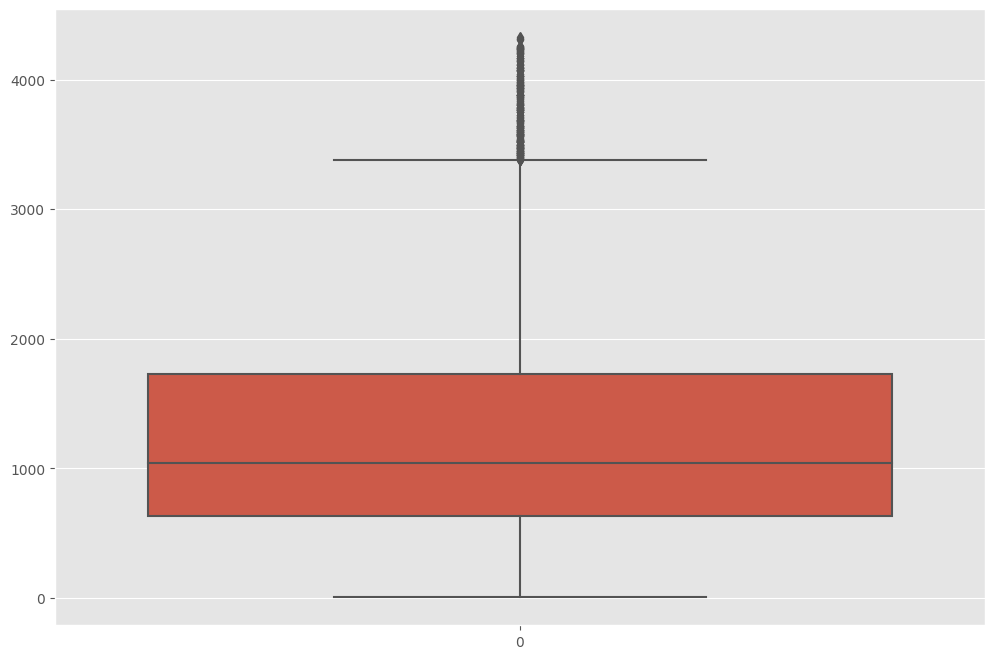

In [21]:
# Boxplot to see if there is outliers
sns.boxplot(dsdo['Value'])

#### There is still outlier we can now us the Inter Quartile Range method to detect and remove outliers

In [22]:
# This loop is for autodetecting the outliers until there is now more to ensure there is no bias in out data

dsdt_trail = dsdo
Q25 = 0
Q75 = 0
for x in range(1) : 
    q25 , q75 = np.percentile(dsdt_trail['Value'], [25, 75])
    iqr = q75 - q25
    lower = q25 - 1.5*iqr
    upper = q75 + 1.5*iqr
    dsdt_trial = dsdt_trail[(dsdt_trail['Value']> lower) & (dsdt_trail['Value'] < upper)]
    dsdt_trial = dsdt_trial.reset_index(drop = True)
    dsdt_tr= dsdt_trail
    for i in range(10):
        q25 , q75 = np.percentile(dsdt_tr['Value'], [25, 75])
        iqr = q75 - q25
        lower = q25 - 1.5*iqr
        upper = q75 + 1.5*iqr
        dsdt_tr = dsdt_tr[(dsdt_tr['Value']> lower) & (dsdt_tr['Value'] < upper)]
        dsdt_tr = dsdt_tr.reset_index(drop = True)
        if q25 == Q25 and q75 == Q75:
            print("Done")
            break
        Q25 = q25
        Q75 = q75
        print("{:.2f}".format(q25) ,"{:.2f}".format(q25), "{:.2f}".format(iqr), "{:.2f}".format(upper), "{:.2f}".format(lower))
        print("New Ranges ", "{:.2f}".format(Q25)  ,"{:.2f}".format(Q75) )
        
dsdt_tr = dsdt_tr     
    

631.05 631.05 1098.25 3376.67 -1016.31
New Ranges  631.05 1729.30
617.65 617.65 981.51 3071.42 -854.61
New Ranges  617.65 1599.16
610.43 610.43 935.29 2948.65 -792.50
New Ranges  610.43 1545.72
605.00 605.00 924.00 2915.00 -781.00
New Ranges  605.00 1529.00
605.00 605.00 917.40 2898.50 -771.10
New Ranges  605.00 1522.40
605.00 605.00 914.02 2890.04 -766.03
New Ranges  605.00 1519.02
605.00 605.00 913.39 2888.46 -765.08
New Ranges  605.00 1518.39
Done


In [23]:
dsdt_tr

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438
...,...,...,...,...,...,...,...,...,...
7134,City Stars,Mobile,CCMW000958390,2873.684,2022-05-03 20:03:00,2022-06-03 16:00:00,2022-06-03 09:22:00,1972,0.910785
7135,City Stars,Mobile,CCMW000958809,2874.696,2022-06-03 11:27:00,2022-06-03 14:00:00,2022-06-03 12:22:00,1972,0.911449
7136,Katameya Heights,Mobile,CCMW000931082,2879.206,2022-06-02 18:16:00,2022-06-02 21:15:00,2022-06-02 19:08:00,1765,0.914404
7137,City Stars,Mobile,CCMW001025423,2880.746,2022-06-05 12:39:00,2022-06-05 15:00:00,2022-06-05 13:12:00,1972,0.915414


<AxesSubplot:>

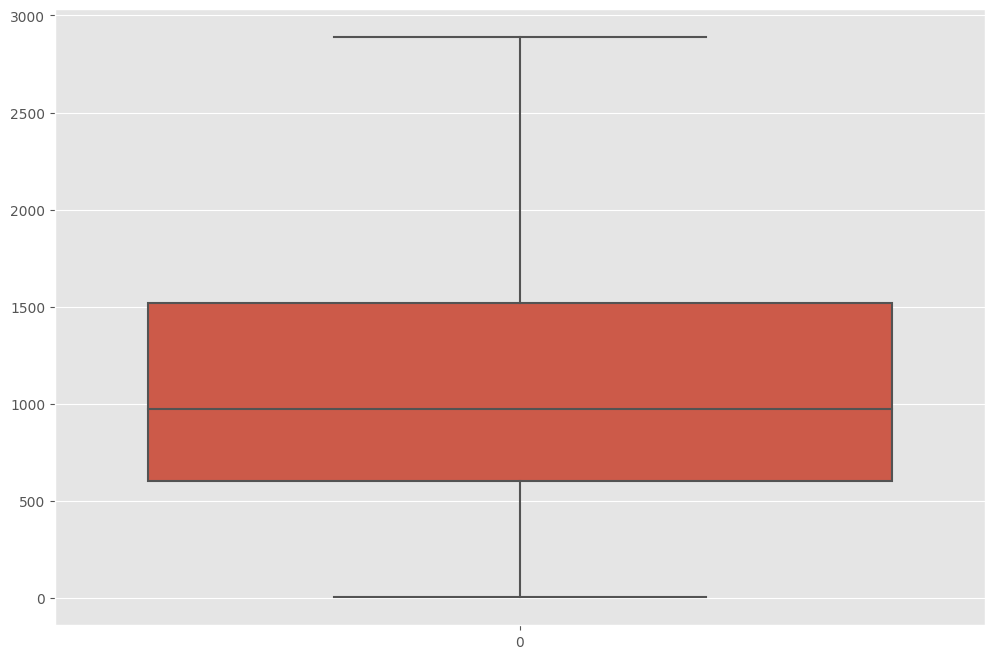

In [24]:
# Now we can see the dataset with no outliers
sns.boxplot(dsdt_tr['Value'])

In [25]:
# Time to get some new column so we can go and visualize them
    # Make a copy to get back if anything happened with the next progress

hmds = dsdt_tr

In [26]:
# Important to make it from object to datetime so we can get the required data

hmds["CreatedAtStore"] = pd.to_datetime(hmds["CreatedAtStore"])
hmds.dtypes


Store                      object
Source                     object
ReferenceNumber            object
Value                     float64
CreatedAtStore     datetime64[ns]
DueDate            datetime64[ns]
CashedTime         datetime64[ns]
CashierNumber               int64
normaldis                 float64
dtype: object

In [27]:
#  To get Hours in pm and am

hmds['CAShour'] = hour_format(hmds, "CreatedAtStore", "CAShour")
hmds['CThour'] = hour_format(hmds, "CashedTime", "CThour")
hmds.head()

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis,CAShour,CThour
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520,05:20 PM,07:22 PM
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792,11:03 AM,11:40 AM
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350,04:24 PM,04:32 PM
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169,01:46 PM,01:52 PM
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438,12:36 PM,12:56 PM


In [1]:
# To get the name of the day in the CreatedAtStore
# leave it to the end
hmds['CASday'] = day_format(hmds, "CreatedAtStore","CASday")
hmds.head()

NameError: name 'day_format' is not defined

In [28]:
# To get the difference time between the created at store and cashed time

hmds['cash_creat_diff'] = (hmds['CashedTime'] - hmds['CreatedAtStore']).dt.total_seconds() / 60 / 60
hmds.head()

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis,CAShour,CThour,cash_creat_diff
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520,05:20 PM,07:22 PM,2.033333
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792,11:03 AM,11:40 AM,0.616667
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350,04:24 PM,04:32 PM,0.133333
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169,01:46 PM,01:52 PM,0.100000
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438,12:36 PM,12:56 PM,0.333333


In [30]:
# To get out the outliers by date and time to ensure crediblity
    # alwasy make a copy a work with it

dat = hmds.copy()
dat['CreatedAtStore'] = pd.to_datetime(dat['CreatedAtStore'])
dat = dat[~(dat['CreatedAtStore'] < '2022-06-01')] # Remove the large amout of time which is considered outliers
dat = dat[dat['cash_creat_diff'] > 0]  # Get out negative time which includes wrong input of dates and time
dat


,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis,CAShour,CThour,cash_creat_diff
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520,05:20 PM,07:22 PM,2.033333
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792,11:03 AM,11:40 AM,0.616667
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350,04:24 PM,04:32 PM,0.133333
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169,01:46 PM,01:52 PM,0.100000
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438,12:36 PM,12:56 PM,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
7132,Maadi_Hub,Mobile,CCMW000893746,2869.350,2022-06-01 10:06:00,2022-06-01 12:03:00,2022-06-01 10:35:00,3603,0.907945,10:06 AM,10:35 AM,0.483333
7135,City Stars,Mobile,CCMW000958809,2874.696,2022-06-03 11:27:00,2022-06-03 14:00:00,2022-06-03 12:22:00,1972,0.911449,11:27 AM,12:22 PM,0.916667
7136,Katameya Heights,Mobile,CCMW000931082,2879.206,2022-06-02 18:16:00,2022-06-02 21:15:00,2022-06-02 19:08:00,1765,0.914404,06:16 PM,07:08 PM,0.866667
7137,City Stars,Mobile,CCMW001025423,2880.746,2022-06-05 12:39:00,2022-06-05 15:00:00,2022-06-05 13:12:00,1972,0.915414,12:39 PM,01:12 PM,0.550000


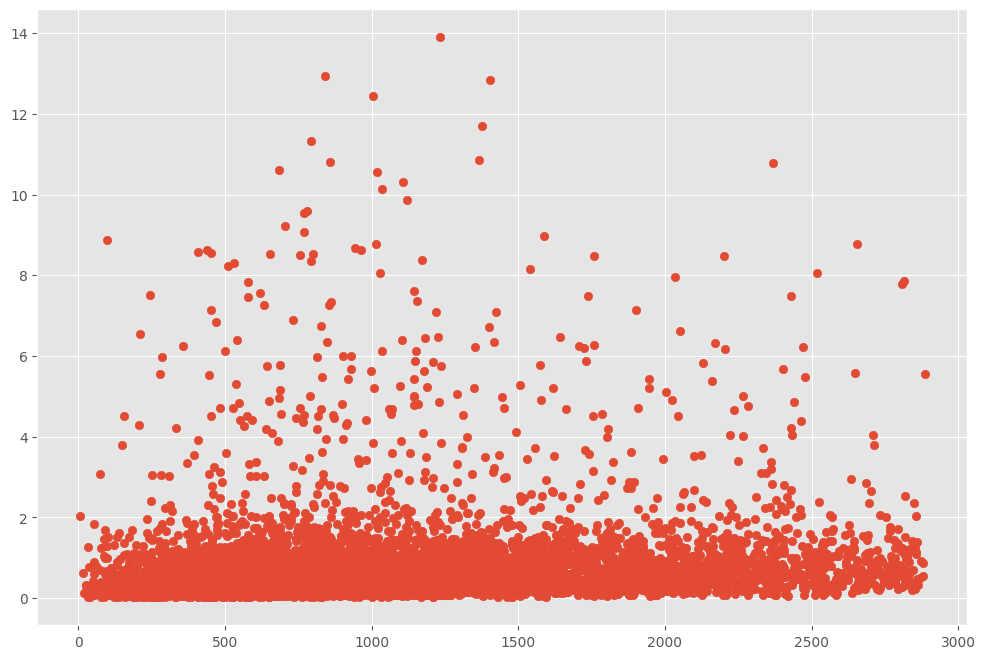

In [31]:
# To see the related time of an order for each price 

plt.scatter(y = dat['cash_creat_diff'] , x = dat['Value'])


In [32]:
# We can now add the day name of the created at store 

dat['CASday'] = day_format(dat, "CreatedAtStore", "CASday")
dat.head()

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,normaldis,CAShour,CThour,cash_creat_diff,CASday
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,-0.969520,05:20 PM,07:22 PM,2.033333,Friday
1,El-Safwa,CALL,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,-0.961792,11:03 AM,11:40 AM,0.616667,Wednesday
2,Maadi_Hub,CALL,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,-0.960350,04:24 PM,04:32 PM,0.133333,Monday
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,-0.956169,01:46 PM,01:52 PM,0.100000,Thursday
4,Arkan,CALL,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,-0.954438,12:36 PM,12:56 PM,0.333333,Saturday


In [33]:
dat.dtypes

Store                      object
Source                     object
ReferenceNumber            object
Value                     float64
CreatedAtStore     datetime64[ns]
DueDate            datetime64[ns]
CashedTime         datetime64[ns]
CashierNumber               int64
normaldis                 float64
CAShour                    object
CThour                     object
cash_creat_diff           float64
CASday                     object
dtype: object

In [34]:
# Some data manipluation 
    # first make a copy 
    # we will capitalize source and delete the normaldis column
dfsales = dat.copy()
dfsales['Source'] = dfsales['Source'].str.capitalize()
del dfsales['normaldis']
dfsales.head()

,Store,Source,ReferenceNumber,Value,CreatedAtStore,DueDate,CashedTime,CashierNumber,CAShour,CThour,cash_creat_diff,CASday
0,Dokki,Mobile,CCMW000959256,4.708,2022-06-03 17:20:00,2022-06-03 19:30:00,2022-06-03 19:22:00,1872,05:20 PM,07:22 PM,2.033333,Friday
1,El-Safwa,Call,ccm2119251,16.500,2022-06-01 11:03:00,2022-06-01 13:00:00,2022-06-01 11:40:00,3174,11:03 AM,11:40 AM,0.616667,Wednesday
2,Maadi_Hub,Call,ccm2370479,18.700,2022-06-06 16:24:00,2022-06-06 18:30:00,2022-06-06 16:32:00,2460,04:24 PM,04:32 PM,0.133333,Monday
3,Katameya Heights,Mobile,CCMW000930701,25.080,2022-06-02 13:46:00,2022-06-02 16:45:00,2022-06-02 13:52:00,1765,01:46 PM,01:52 PM,0.100000,Thursday
4,Arkan,Call,ccm2266804,27.720,2022-06-04 12:36:00,2022-06-04 14:30:00,2022-06-04 12:56:00,2804,12:36 PM,12:56 PM,0.333333,Saturday


In [35]:
# Capializing the Cashier names for a more neat data

dfcashier = dcd.copy()
dfcashier['CashierName'] = dfcashier['CashierName'].str.capitalize()
dfcashier

,CashierName,CashierNumber
0,K.magdy,2952
1,S.talaat,2947
2,Y.hany,2992
3,S.gamal,1702
4,M.nagah,1972
...,...,...
122,H.hafez,2286
123,M.karam,2745
124,A.khalifa,2210
125,A.amin,1221


In [36]:
# Time to save the new excel files

dfcashier.to_excel('Cashier.xlsx', index=False)
dfsales.to_excel('Sales.xlsx', index=False)